# Practice Session 2: Data and Probability Distributions

In this session, we explore how data can be represented and analyzed through **probability distributions**.  
Probability describes how likely different outcomes are to occur. In some simple cases (such as rolling dice) we can list every possible result.  
But in most real-world problems, the number of possible outcomes is extremely large or even unknowable.  

In such situations, we rely on **theoretical probability distributions** to describe the data-generating process in a compact, mathematical way.  
These models allow us to reason about uncertainty and make predictions without knowing every possible event in advance.

### Empirical vs. Theoretical Distributions

**Empirical distribution**  
- Summarizes what we *observe* in real data.  
- Built from frequency counts or relative frequencies of observed values.  

**Theoretical distribution**  
- A mathematical description of how data *should* behave under certain assumptions.  
- Defined by parameters (e.g., mean (*μ*), standard deviation (*σ*)).  

By comparing the empirical and theoretical distributions, we can evaluate how well a mathematical model describes real data. This is a central idea in statistical modeling.

### Why Probability Distributions Matter

Probability distributions form the foundation of **statistical inference**.  
They allow us to quantify how likely our observed data would be if a particular assumption, called the **null hypothesis**, were true.

For example, in a *t*-test or ANOVA, we ask:
*How probable is it to observe such a large difference between groups if, in reality, there is no true difference?*

These tests, along with regression and many other methods, are **parametric**. They assume that random errors follow a particular theoretical distribution, usually the **Normal** distribution.

## Part 1: Fair and Biased Dice

To connect theory with practice, we will now simulate one of the most intuitive probability experiments: **rolling dice**.  
A die is a perfect illustration of a **discrete probability distribution** where each outcome has a defined probability.

- In a **fair die**, every face (1 to 6) has the same probability of occurring:  
  \begin{equation} P(1) = P(2) = \dots = P(6) = \frac{1}{6} \end{equation}
- In a **biased (unfair) die**, some faces are more likely than others, meaning the theoretical probabilities are *not equal*.

Our goal is to:
1. Generate data from both a fair and a biased die.  
2. Compare the **empirical distributions** (observed frequencies) with the **theoretical expectations**.  
3. Observe how differences become clearer as the number of rolls increases.

This experiment demonstrates how **probability models** translate into **observable data**, and how we can detect deviations from randomness using simulation.




In [2]:
import pandas as pd
import numpy as np
from numpy.random import default_rng

import seaborn as sns

from scipy import stats
from scipy.stats import skew, kurtosis, shapiro, kstest

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

In [3]:
# Initialize a random number generator with a fixed seed (0)
# Using a fixed seed ensures that the random results are reproducible
rng = default_rng(42)

![answer_42](https://m.media-amazon.com/images/I/71OUpZCZwWL._UF894,1000_QL80_.jpg)

First, we’ll define two functions that simulate rolling dice.  
- The first one will represent a fair die (`fair_die`), where all six faces are equally likely to appear.  
- The second one will represent a biased die (`biased_die`), where one face (6) has a higher probability than the others.  

These functions will help us generate simulated data and later compare how the outcomes differ between fair and biased dice.

In [4]:
def fair_die(n_rolls):
 return rng.integers(low=1, high=7, size=n_rolls)

def biased_die(n_rolls):
 p = [1/7, 1/7, 1/7, 1/7, 1/7, 2/7]
 return rng.choice([1,2,3,4,5,6], size=n_rolls, p=p)

#### <font color='#fc7202'> Task 1: </font> 
Roll both dice once. Based on a single roll, can we tell which die is fair and which one is biased?

In [ ]:
# Roll a fair die once
fair_die(1)

array([4])

In [ ]:
# Roll a biased die once
biased_die(1)

array([1])

#### <font color='#fc7202'> Task 2: </font> 
Use the functions you defined above to roll each die seven times.  
> *Remember that the functions take as input the number of rolls you want to perform.*  

After generating the results, consider whether you can tell which die is fair and which one is biased based on these seven outcomes.

In [ ]:
# Roll a fair die 7 times
fair_die(7)

array([5, 3, 6, 1, 4, 5, 6])

In [ ]:
# Roll a biased die 7 times
biased_die(7)

array([1, 5, 5, 5, 3, 6, 6])

#### <font color='#fc7202'> Task 3: </font>  
Generate a new series of seven throws for both dice, and store the results in a DataFrame with two columns: **`fair_die`** and **`biased_die`**.  
> *Hint:* 
> - Think about how you can use a **dictionary** to create a DataFrame.
> - To visualize the results, either use **`np.bincount()`** to count how many times each face (1–6) appears, or try using **Seaborn’s `countplot()`** function, which performs the counting automatically.  

After that, plot the **bar plots** of both series and compare their distributions.


In [9]:
dice_7 = pd.DataFrame({'fair_die': fair_die(7), 'biased_die': biased_die(7)}) 

<font color='#00bf63'> **First option to visualize** </font>

<Axes: xlabel='biased_die', ylabel='count'>

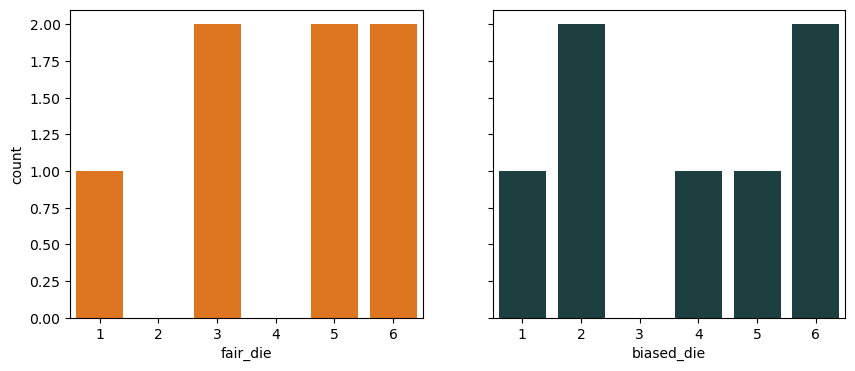

In [48]:
# Set up side-by-side subplots
fig, axs = plt.subplots(1, 2, # 1 row, 2 columns
                        figsize=(10, 4), 
                        sharey=True) # Share y-axis

# Plot histogram for fair die
sns.countplot(x='fair_die', data=dice_7, color='#fc7202', order=[1, 2, 3, 4, 5, 6], ax=axs[0]) # ax=axs[0] means first subplot
# Plot histogram for biased die
sns.countplot(x='biased_die', data=dice_7, color='#184445',
              order=np.arange(1, 7), # Same as order=[1, 2, 3, 4, 5, 6]
              ax=axs[1]) # ax=axs[1] means second subplot

<font color='#00bf63'> **Second option to visualize** </font>

In [35]:
dice_7_counts = pd.DataFrame({'fair_die_count': np.bincount(dice_7.fair_die)[1:], 'biased_die_count': np.bincount(dice_7.biased_die)[1:]}, index=np.arange(1, 7))
dice_7_counts

,fair_die_count,biased_die_count
1,1,1
2,0,2
3,2,0
4,0,1
5,2,1
6,2,2


> *Note:* 
> 1. We are first creating a new DataFrame that shows how many times each face (1-6) appeared\
>    The `index=np.arange(1, 7)` part explicitly labels the rows with the die faces 1 through 6.
> 2. Then we use `np.bincount()` to count the number of occurrences of each face.\
>    `[1:]` is used to skip index 0, because dice faces start from 1 (not 0).
> 3. The resulting DataFrame has one row per die face and two columns:
>       - `fair_die_count` for the fair die
>       - `biased_die_count` for the biased die

<Axes: >

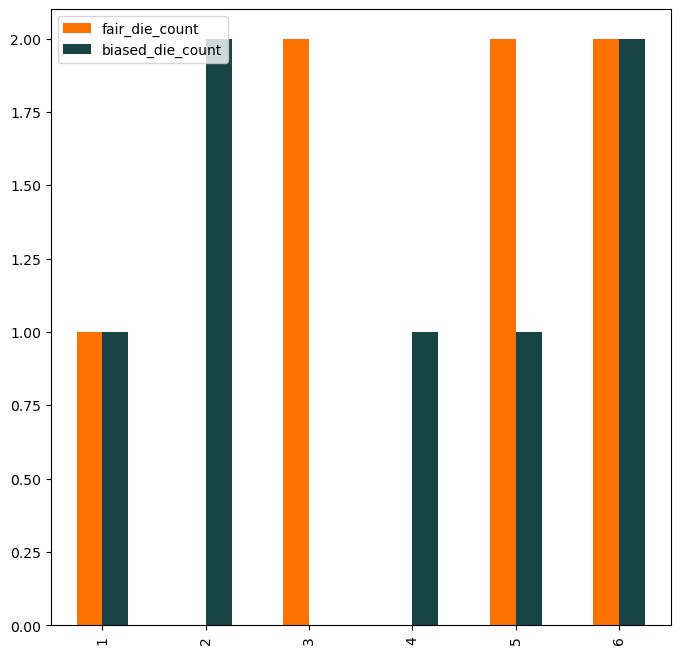

In [32]:
dice_7_counts.plot.bar(color=['#fc7202', '#184445'])

#### Visualizing Multiple Simulations

To better understand how randomness affects our results, let’s simulate the experiment several times.  
Below, we generate **nine independent series**, each containing **seven throws** for both the fair and the biased die.  
The results are displayed as a **3 × 3 grid of bar plots**, showing how the observed frequencies vary between simulations even when the underlying probabilities remain the same.


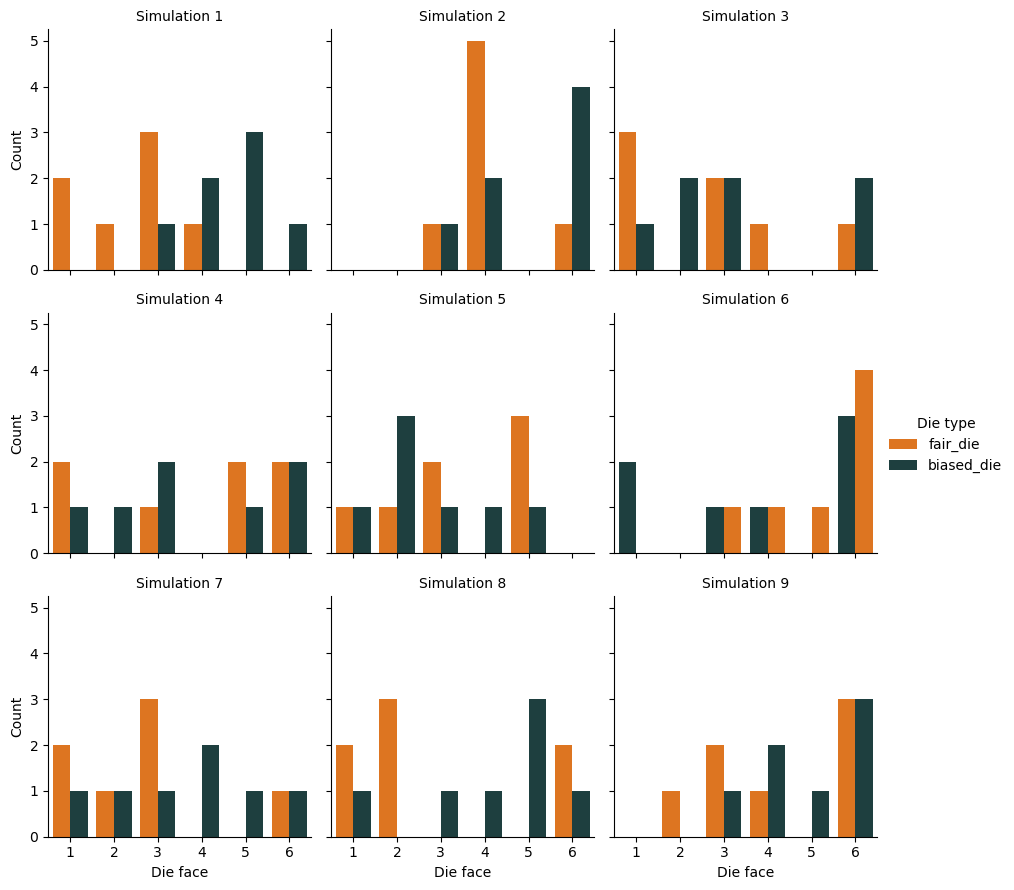

In [37]:
# Create a list to store simulation results
all_data = []

# Generate nine independent 7-throw series for both dice
for i in range(9):
    df = pd.DataFrame({'fair_die': fair_die(7),'biased_die': biased_die(7)})
    
    # Add an identifier for each simulation
    df['simulation'] = i + 1
    
    # Reshape to long format for easier plotting with seaborn
    df_long = df.melt(id_vars='simulation', value_vars=['fair_die', 'biased_die'],
                      var_name='die_type', value_name='value')
    all_data.append(df_long)

# Combine all simulations into one DataFrame
plot_df = pd.concat(all_data, ignore_index=True)

# Create a 3×3 grid of bar plots (one per simulation)
g = sns.FacetGrid(plot_df, col='simulation', col_wrap=3, height=3, sharey=True)
g.map_dataframe(sns.countplot, x='value', hue='die_type',
                palette={'fair_die': '#fc7202', 'biased_die': '#184445'}, order=np.arange(1, 7))

g.set_titles('Simulation {col_name}')
g.set_axis_labels('Die face', 'Count')
g.add_legend(title='Die type')

plt.show()


#### <font color='#fc7202'> Task 4: </font>  
Examine the 3 × 3 grid of bar plots. Based on these nine simulations (each with seven throws per die), can you tell which die is fair and which one is biased?  



#### <font color='#fc7202'> Task 5: </font>  
In the cell below, **increase the number of rolls `n`** and re-run the simulation for both dice.  

From what value of `n` do the results give you enough evidence to distinguish the **biased** die from the **fair** die?

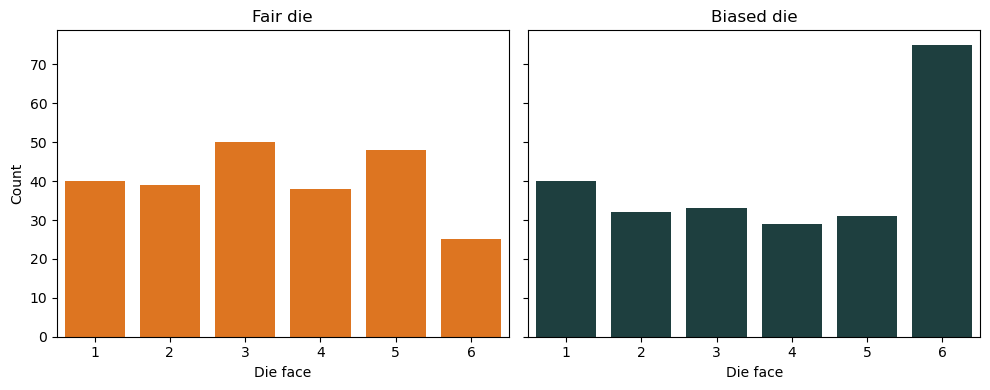

In [33]:
n = 240  # Increase this value and re-run the simulation

# Generate new series of n throws for both dice
fair_series = fair_die(n)
biased_series = biased_die(n)

# Combine into a single DataFrame
df = pd.DataFrame({'die_type': ['Fair'] * n + ['Biased'] * n, 'value': np.concatenate([fair_series, biased_series])})

# Set up side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot fair die
sns.countplot(data=df[df['die_type'] == 'Fair'], x='value', color='#fc7202', order=[1, 2, 3, 4, 5, 6], ax=axs[0])
axs[0].set_title('Fair die')
axs[0].set_xlabel('Die face')
axs[0].set_ylabel('Count')

# Plot biased die
sns.countplot(data=df[df['die_type'] == 'Biased'], x='value', color='#184445', order=[1, 2, 3, 4, 5, 6], ax=axs[1])
axs[1].set_title('Biased die')
axs[1].set_xlabel('Die face')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

#### The Number of Sixes and the Binomial Distribution

When we roll a die several times, each throw can be viewed as a **Bernoulli trial**, meaning that there are only two possible outcomes for the question *“Did we roll a six?”*: `yes` or `no`.

If this experiment is repeated $n$ times, the total number of sixes follows a **Binomial distribution**.  
This happens because each roll is **independent**, the probability of rolling a six is **constant** $p = \frac{1}{6}$, and we are simply counting how many sixes occur in $n$ repeated rolls.

The binomial model allows us to describe the expected variability in the number of sixes across many repetitions of the experiment.  
In the next step, we will simulate this process and compare the results to the theoretical binomial distribution.



#### <font color='#fc7202'> Task 6: </font>  
Roll the fair die **10 times** and count how many times you get a six.  

> *Hint:* You can use a **`for` loop** to simulate each roll, check whether the result equals six, and keep a running count.

In [42]:
roll_10_fair = fair_die(10)
roll_10_fair

array([6, 5, 3, 3, 2, 1, 4, 4, 1, 3])

<font color='#00bf63'> **With the `for loop`** </font>

In [43]:
six_counter = 0
for roll in roll_10_fair:
    if roll == 6:
        six_counter += 1

six_counter

1

<font color='#00bf63'> **With the `Numpy`** </font>

In [45]:
# The expression (roll_10_fair == 6) creates a Boolean array where True means "this roll was a six".
# When we apply np.sum(), Python treats True as 1 and False as 0, giving the total count of sixes.
number_of_sixes = np.sum(roll_10_fair == 6) 
number_of_sixes

np.int64(1)

#### <font color='#fc7202'> Task 7: </font>  
Now roll **both dice** (the fair and the biased one) **10 times each**, and count how many sixes you get for each die.  
Repeat this entire experiment **1000 times** to see how the number of sixes varies between repetitions.  

For every repetition, store the number of sixes in a list or array.  
After running the simulation, you will have two datasets (one for the fair die and one for the biased die) showing how often different counts of sixes occurred across 1000 experiments.

Finally, **plot the results as bar plots** to visualize how the distributions of the number of sixes differ between the fair and biased dice.

> *Hint:*  
> - Use a **`for` loop** to repeat the 10-roll experiment 1000 times.  
> - Inside the loop, count how many sixes appear using `np.sum()` or a simple counter.  
> - After collecting all counts, use `sns.countplot()` or `plt.bar()` to display how frequently each number of sixes occurred.






In [51]:
number_of_simulations = 1000

fair_die_six_counter = []
biased_die_six_counter = []

for i in range(number_of_simulations):
    roll_10_sim_fair = fair_die(10)
    fair_die_six_counter.append(np.sum(roll_10_sim_fair == 6))

    roll_10_sim_biased = biased_die(10)
    biased_die_six_counter.append(np.sum(roll_10_sim_biased == 6))

<Axes: ylabel='count'>

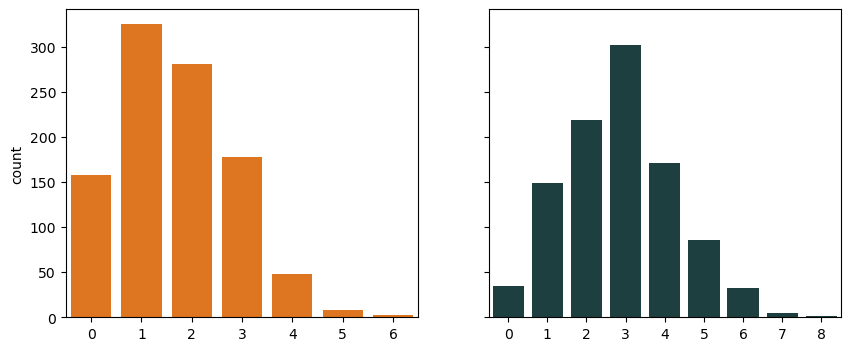

In [ ]:
# Side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True) # Share y-axis

# Plot histogram for fair die
sns.countplot(x=fair_die_six_counter, color='#fc7202', ax=axs[0]) # ax=axs[0] means first subplot
# Plot histogram for biased die
sns.countplot(x=biased_die_six_counter, color='#184445', ax=axs[1]) # ax=axs[1] means second subplot

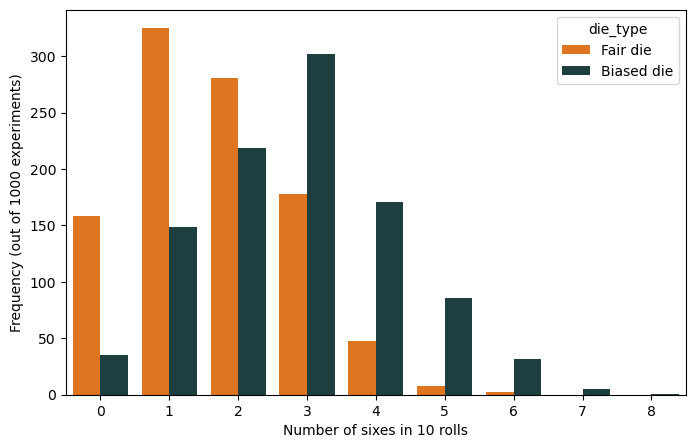

In [56]:
# One plot
# Combine the results into a DataFrame for easy plotting
df = pd.DataFrame({'Fair die': fair_die_six_counter, 'Biased die': biased_die_six_counter})

# Convert to long format for seaborn
df_long = df.melt(var_name='die_type', value_name='six_count')

# Plot bar plots of the results
plt.figure(figsize=(8, 5))
sns.countplot(data=df_long, x='six_count', hue='die_type', palette={'Fair die': '#fc7202', 'Biased die': '#184445'}, order=sorted(df_long['six_count'].unique()))
plt.xlabel('Number of sixes in 10 rolls')
plt.ylabel('Frequency (out of 1000 experiments)')
plt.show()

>If you want to learn more about the **Binomial distribution**, you can visit the interactive explanation here:  
> [Math Is Fun — Binomial Distribution](https://www.mathsisfun.com/data/binomial-distribution.html)


## Part 2: The Wine Quality Dataset

So far, we have worked with simulated data to understand basic probability concepts.  
Next, we turn to a real-world dataset: the **Wine Quality dataset**, which contains chemical measurements of red wines along with their quality ratings.  

Let’s start by reading in the data and taking a first look at its structure (the variables it contains, their types, and what kind of information they represent).


In [58]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=";")

# Display the first few rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [60]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### <font color='#fc7202'> Task 8: </font>  
Explore the dataset by plotting the distributions of all numeric variables.  
Where relevant, display the distributions as **histograms** to get a sense of their shape (e.g., symmetric, skewed, multimodal).

> *Hints:*  
> - You can loop through the numeric columns and use **`sns.histplot()`** or **`plt.hist()`** to create the plots.  
> - Pay attention to variables that might have very different ranges or units — these can affect how the histogram looks.  
> - Try adjusting the number of bins to make the shape clearer.


In [61]:
wine_data.columns # Get all column names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

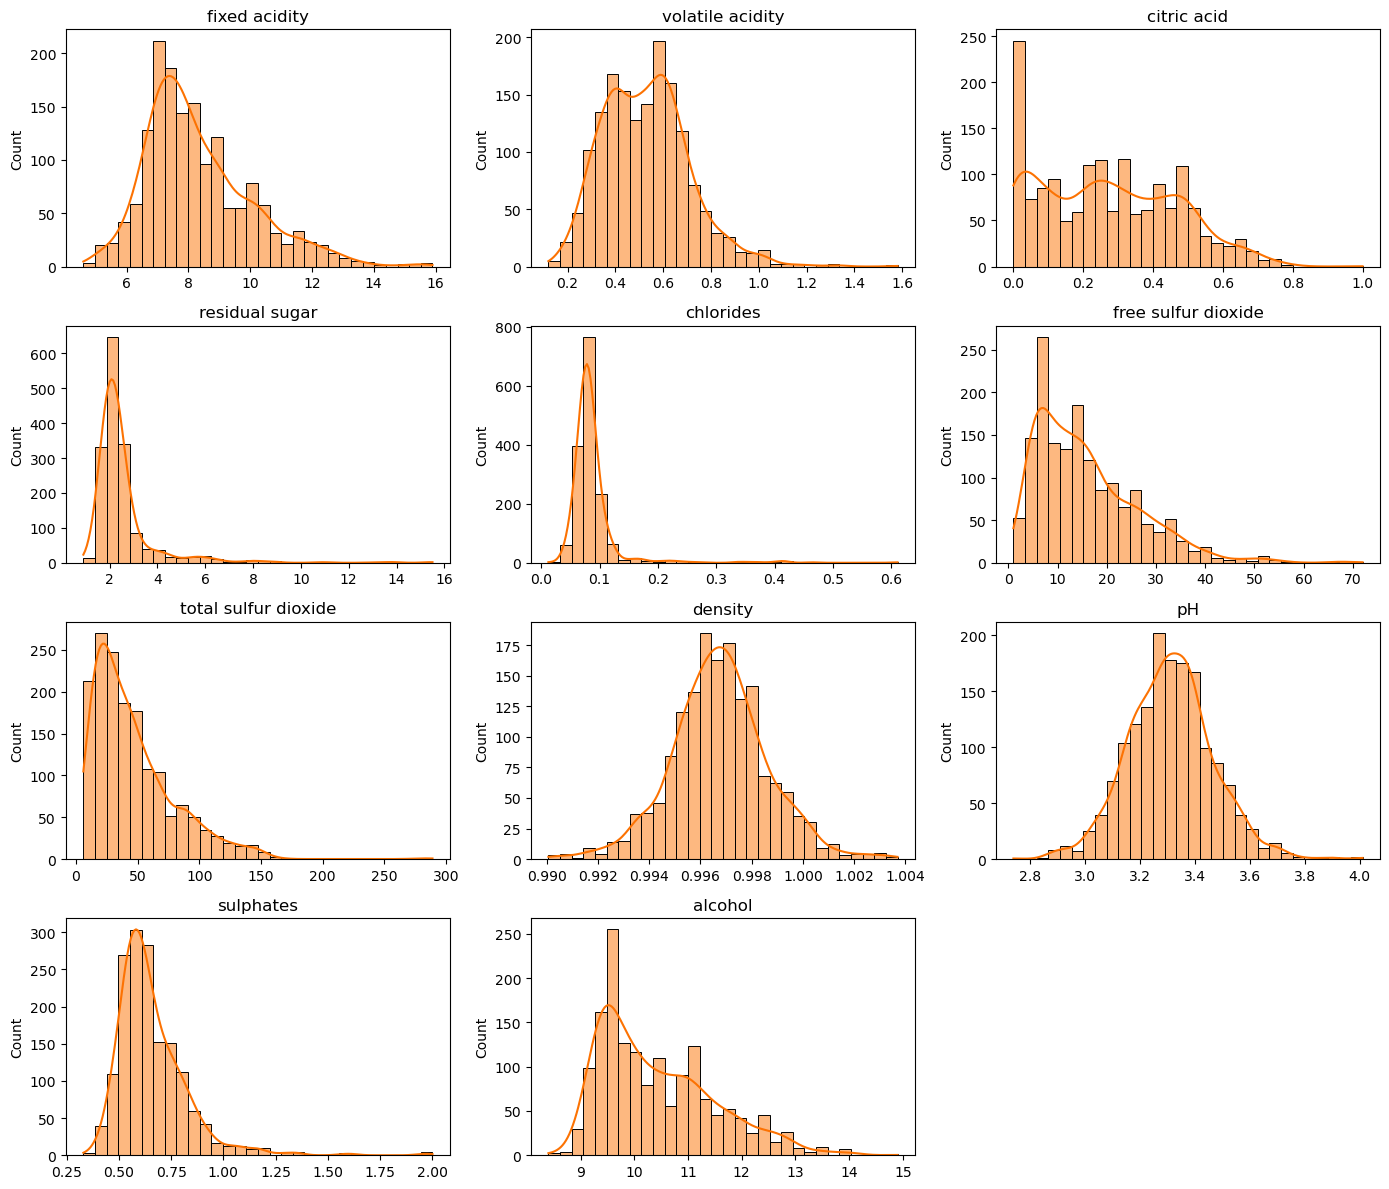

In [70]:
# Select only continuous numeric variables for visualization.
# We exclude the last column, 'quality', because it represents a categorical rating (an ordinal label rather than a continuous measurement).
continues_variables = wine_data.columns[:-1]  

# Determine grid size for subplots
n_cols = 3
n_rows = int(np.ceil(len(continues_variables) / n_cols))

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
axes = axes.flatten()

# Loop through each numeric column and plot histogram
for i, col in enumerate(continues_variables):
    sns.histplot(data=wine_data, x=col, bins=30, kde=True, color="#fc7202", ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")

# Remove any empty subplots (if the number of variables isn’t a multiple of 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### <font color='#fc7202'> Task 9: </font>  
For each numeric variable, calculate the **skewness** and **kurtosis** to quantify the shape of its distribution.  
Compare these numerical values with your histograms from the previous step.

> *Hints:*  
> - You can use the built-in **`.skew()`** and **`.kurt()`** methods in `pandas` to compute these statistics.  
> - Alternatively, the **`scipy.stats`** package provides the functions **`skew()`** and **`kurtosis()`** for the same purpose.  
> - **Skewness** close to 0 suggests symmetry, while positive or negative values indicate right or left skew.  
> - **Excess kurtosis** close to 0 (as in a normal distribution) indicates typical tail thickness, whereas large positive values suggest heavy tails.  



In [84]:
# Using pandas, we can directly select the continuous variables and compute their skewness and excess kurtosis.
# The .skew() and .kurt() methods return these values for each column in one step.
# Note: pandas returns **excess kurtosis**, meaning that a normal distribution has a kurtosis value of 0.
print('Skewness:')
print(wine_data[continues_variables].skew())
print() # Print a blank line for better readability
print('Excess kurtosis:')
print(wine_data[continues_variables].kurt())


Skewness:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

Excess kurtosis:
fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
dtype: float64


In [ ]:
# With scipy, we need to compute skewness and kurtosis for each column individually.
# We can do it using for example the for loop.
print('Skewness:')
for col in continues_variables:
    print(f"{col}: {skew(wine_data[col])}")

print() # Print a blank line for better readability

print('Excess kurtosis:')
for col in continues_variables:
    print(f"{col}: {kurtosis(wine_data[col], fisher=True)}") # fisher=True means we want excess kurtosis


Skewness:
fixed acidity: 0.9818292953262073
volatile acidity: 0.6709623963499574
citric acid: 0.3180385895475358
residual sugar: 4.536394788805638
chlorides: 5.675016527504259
free sulfur dioxide: 1.249393847434253
total sulfur dioxide: 1.5141091878506638
density: 0.07122077153539946
pH: 0.19350175891005525
sulphates: 2.426393455449087
alcohol: 0.8600210646566755

Excess kurtosis:
fixed acidity: 1.1248563352037486
volatile acidity: 1.2179633893005306
citric acid: -0.7902825153036646
residual sugar: 28.524437824252235
chlorides: 41.581708043675775
free sulfur dioxide: 2.01348999733378
total sulfur dioxide: 3.7941717664905665
density: 0.9274107990478333
pH: 0.8006714441211544
sulphates: 11.6798841115311
alcohol: 0.1956543762123122


<font color='#00bf63'> **EXTRA** </font>

In [87]:
# Create a summary DataFrame for skewness and excess kurtosis
summary = pd.DataFrame({
    'Skewness (pandas)': wine_data[continues_variables].skew(),
    'Excess kurtosis (pandas)': wine_data[continues_variables].kurt(),  # pandas returns excess kurtosis
    'Skewness (scipy)': [skew(wine_data[col]) for col in continues_variables],
    'Excess kurtosis (scipy)': [kurtosis(wine_data[col], fisher=True) for col in continues_variables]}, index=continues_variables)

# Round for readability
summary = summary.round(3)

# Display the summary table
summary

,Skewness (pandas),Excess kurtosis (pandas),Skewness (scipy),Excess kurtosis (scipy)
fixed acidity,0.983,1.132,0.982,1.125
volatile acidity,0.672,1.226,0.671,1.218
citric acid,0.318,-0.789,0.318,-0.790
residual sugar,4.541,28.618,4.536,28.524
chlorides,5.680,41.716,5.675,41.582
free sulfur dioxide,1.251,2.024,1.249,2.013
total sulfur dioxide,1.516,3.810,1.514,3.794
density,0.071,0.934,0.071,0.927
pH,0.194,0.807,0.194,0.801
sulphates,2.429,11.720,2.426,11.680


> *Note:*  
> This summary table displays the **skewness** and **excess kurtosis** for each continuous variable, computed using both **`pandas`** and **`SciPy`**.\
> The two libraries use slightly different functions but follow the same underlying formulas, so the results should be nearly identical (apart from minor rounding differences).\
> For the columns (`Skewness (scipy)` and `Excess kurtosis (scipy)`), we use **list comprehensions** - compact loops that generate lists of values.
>
> This code does exactly the same calculations as in the previous cell (it computes the **skewness** and **excess kurtosis** for each variable using `scipy.stats`).\
> But the difference is that instead of printing the results one by one in a loop, we use **list comprehensions** to create a list of values for all variables at once.
>
> See below:

In [89]:
[skew(wine_data[col]) for col in continues_variables]

[np.float64(0.9818292953262073),
 np.float64(0.6709623963499574),
 np.float64(0.3180385895475358),
 np.float64(4.536394788805638),
 np.float64(5.675016527504259),
 np.float64(1.249393847434253),
 np.float64(1.5141091878506638),
 np.float64(0.07122077153539946),
 np.float64(0.19350175891005525),
 np.float64(2.426393455449087),
 np.float64(0.8600210646566755)]

#### Q-Q Plots (Quantile-Quantile Plots)

A **Q-Q plot** is a graphical method to assess whether the distribution of your data is similar to a **theoretical distribution**, most often the **normal distribution**.

The idea is simple:
- The data are first **sorted** and transformed into **quantiles** (percentile positions).  
- These quantiles are then plotted against the corresponding quantiles of the theoretical distribution.  
- If the data follow that theoretical distribution closely, the points will lie roughly along a **straight line**.

Q-Q plots therefore provide a quick, visual way to check whether a variable is approximately **normally distributed** (complementing the skewness and kurtosis values you just calculated).


#### <font color='#fc7202'> Task 10: </font>  
Choose **two numeric variables** from the wine dataset and create **Q–Q plots** to visually assess whether they follow a normal distribution.

> *Hints:*  
> - You can use the function **`scipy.stats.probplot()`** to generate Q–Q plots.  
> - Try selecting one variable that looks approximately normal and another that appeared skewed in your histograms.


<font color='#00bf63'> **Here I’m plotting all variables so you can check and compare your own plots with these reference plots.** </font>

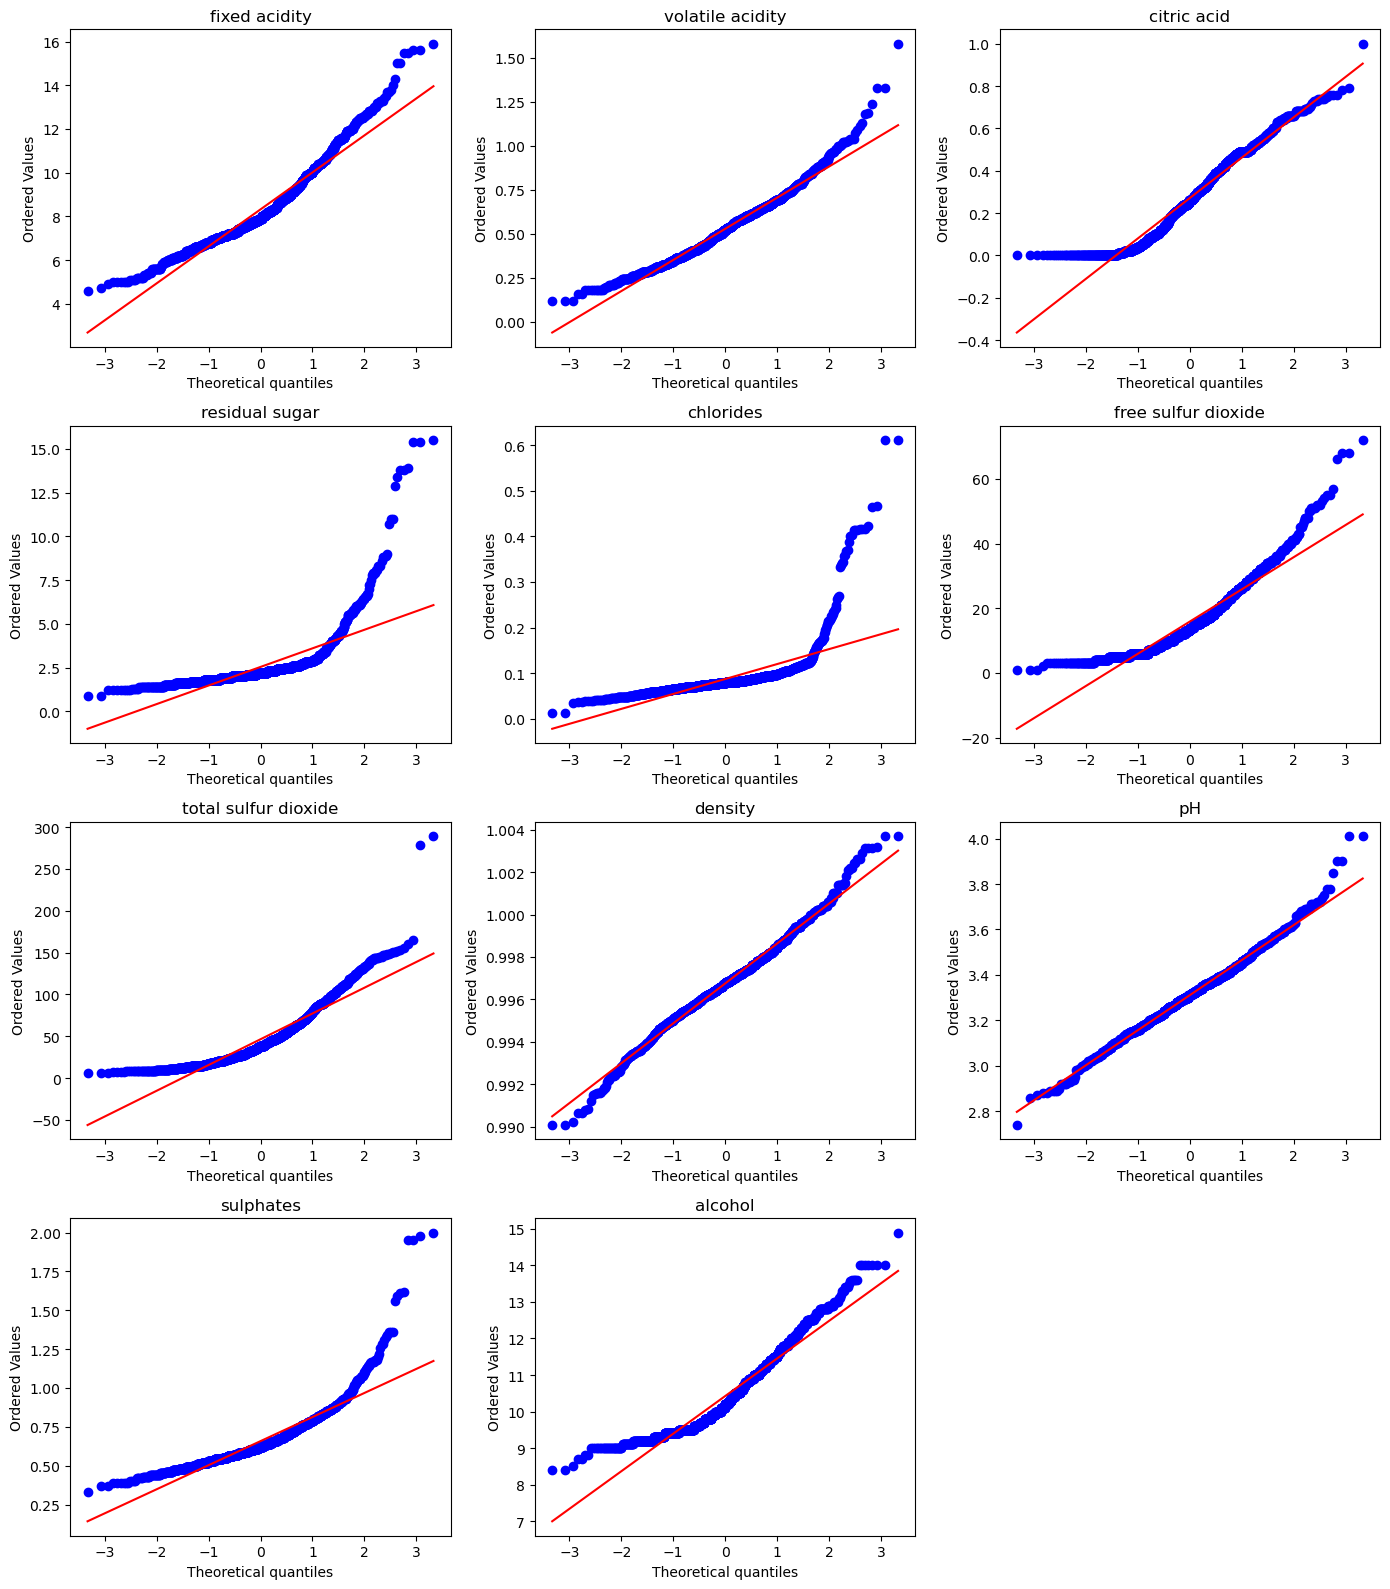

In [92]:
# Determine subplot layout
n_cols = 3
n_rows = int(np.ceil(len(continues_variables) / n_cols))

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

# Generate Q–Q plots for each numeric variable
for i, col in enumerate(continues_variables):
    stats.probplot(wine_data[col], dist="norm", plot=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots if there are fewer variables than grid cells
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Testing for (Approximate) Normality

We can formally assess whether a variable is consistent with a normal distribution using statistical tests.

- **Null hypothesis (H₀).** The data were drawn from a normal distribution (with some mean and variance).

- ***p*-value.** The probability, assuming H₀ is true, of obtaining results at least as extreme as what we observed. A small *p*-value gives evidence against H₀.

Two useful tests:

1) **Shapiro-Wilk test** (`scipy.stats.shapiro`)  
   Designed for normality. Powerful for small to moderate sample sizes. Widely used.

2) **Kolmogorov-Smirnov (KS) test** against normal (`scipy.stats.kstest`)  
   Compares the empirical distribution function to a specified theoretical cumulative distribution function (CDF).

**How to read the result?**  
If the *p*-value is below your chosen significance level (often 0.05), you reject H₀ and conclude the data deviate from normality. If the *p*-value is larger, you do not reject H₀ (the data are consistent with normality at that level).


#### <font color='#fc7202'> Task 11: </font>  
Apply the **Shapiro-Wilk** and **KS** tests to the same two variables you selected earlier.  
Compare the *p*-values with your histograms and Q-Q plots.  
Do the test results align with your visual assessments?

<font color='#00bf63'> **Below, I will apply the same tests to all variables so that you can compare your results with the full output.** </font>

In [98]:
# Shapiro-Wilk test for normality
print("Shapiro-Wilk Test Results:")
for col in continues_variables:
    stat, p_value = shapiro(wine_data[col])
    print(f"{col}: W={stat:.4f}, p-value={p_value:.4f}")

# Kolmogorov-Smirnov test for normality
print("\nKolmogorov-Smirnov Test Results:")
for col in continues_variables:
    # The 'args' parameter supplies the mean (μ) and standard deviation (σ) of the normal distribution we want to compare against.
    # By using the sample's own mean and standard deviation, we test whether the variable could have come from *some* normal distribution with the same parameters.
    # (If we didn't provide these values, the test would use the standard normal N(0,1) by default, which would only be appropriate if the data were already standardized.)
    stat, p_value = kstest(wine_data[col], 'norm', args=(np.mean(wine_data[col]), np.std(wine_data[col])))
    print(f"{col}: D={stat:.4f}, p-value={p_value:.4f}")

Shapiro-Wilk Test Results:
fixed acidity: W=0.9420, p-value=0.0000
volatile acidity: W=0.9743, p-value=0.0000
citric acid: W=0.9553, p-value=0.0000
residual sugar: W=0.5661, p-value=0.0000
chlorides: W=0.4842, p-value=0.0000
free sulfur dioxide: W=0.9018, p-value=0.0000
total sulfur dioxide: W=0.8732, p-value=0.0000
density: W=0.9909, p-value=0.0000
pH: W=0.9935, p-value=0.0000
sulphates: W=0.8330, p-value=0.0000
alcohol: W=0.9288, p-value=0.0000

Kolmogorov-Smirnov Test Results:
fixed acidity: D=0.1105, p-value=0.0000
volatile acidity: D=0.0547, p-value=0.0001
citric acid: D=0.0839, p-value=0.0000
residual sugar: D=0.2607, p-value=0.0000
chlorides: D=0.2596, p-value=0.0000
free sulfur dioxide: D=0.1112, p-value=0.0000
total sulfur dioxide: D=0.1210, p-value=0.0000
density: D=0.0447, p-value=0.0032
pH: D=0.0403, p-value=0.0108
sulphates: D=0.1248, p-value=0.0000
alcohol: D=0.1215, p-value=0.0000


#### What If the Data Are Not Normally Distributed?

In environmental datasets, approximate normality is **rarely guaranteed**.  
Many environmental variables have natural limits or arise from multiplicative processes, which makes them **skewed** rather than symmetric.

For example:
- Variables that **cannot take negative values** (for example concentrations) often show a **log-normal** pattern.  
- **Waiting times** or **time-to-event** measurements are commonly **exponentially** distributed.  
- **Durations**, **failure times**, or **life spans** may follow a **Weibull** distribution, which is flexible enough to describe both increasing and decreasing failure rates.

Below is a simple illustration of these theoretical shapes.  
Use it as a visual guide when considering which type of distribution might best represent your variables.



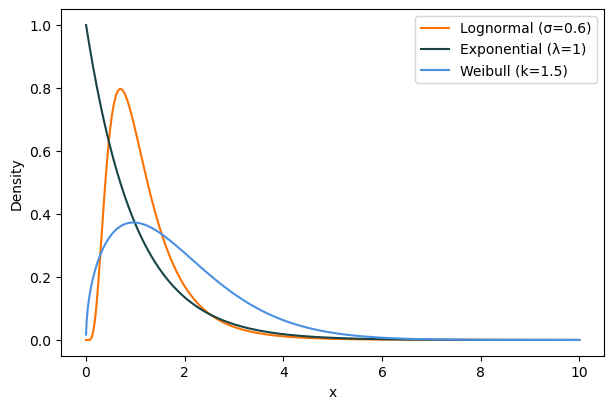

In [ ]:
from scipy.stats import lognorm, expon, weibull_min

x = np.linspace(0.001, 10, 1000)

# Example parameter choices (illustrative)
# Lognormal: shape = sigma, scale = exp(mu)
ln_shape, ln_mu = 0.6, 0.0
ln_scale = np.exp(ln_mu)

# Exponential: scale = 1/lambda
exp_scale = 1.0

# Weibull: c (shape), scale
wb_shape, wb_scale = 1.5, 2.0

plt.figure(figsize=(7, 4.5))
plt.plot(x, lognorm.pdf(x, s=ln_shape, scale=ln_scale), label='Lognormal (σ=0.6)', color='#fc7202')
plt.plot(x, expon.pdf(x, scale=exp_scale), label='Exponential (λ=1)', color='#184445')
plt.plot(x, weibull_min.pdf(x, c=wb_shape, scale=wb_scale), label='Weibull (k=1.5)', color='#4a90e2')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


#### <font color='#fc7202'> Task 12 (thinking): </font>  
Looking back at your histograms and Q–Q plots, does any variable appear to follow a **log-normal**, **exponential**, or **Weibull**-like distribution?  


### Transformations toward Normality

If a variable appears **log-normal**, taking logarithms often produces a variable that is closer to normal.  
This can stabilize variance, reduce skewness, and make residuals behave more like those assumed by parametric methods.

Let us test this idea on one variable that looks log-normal.


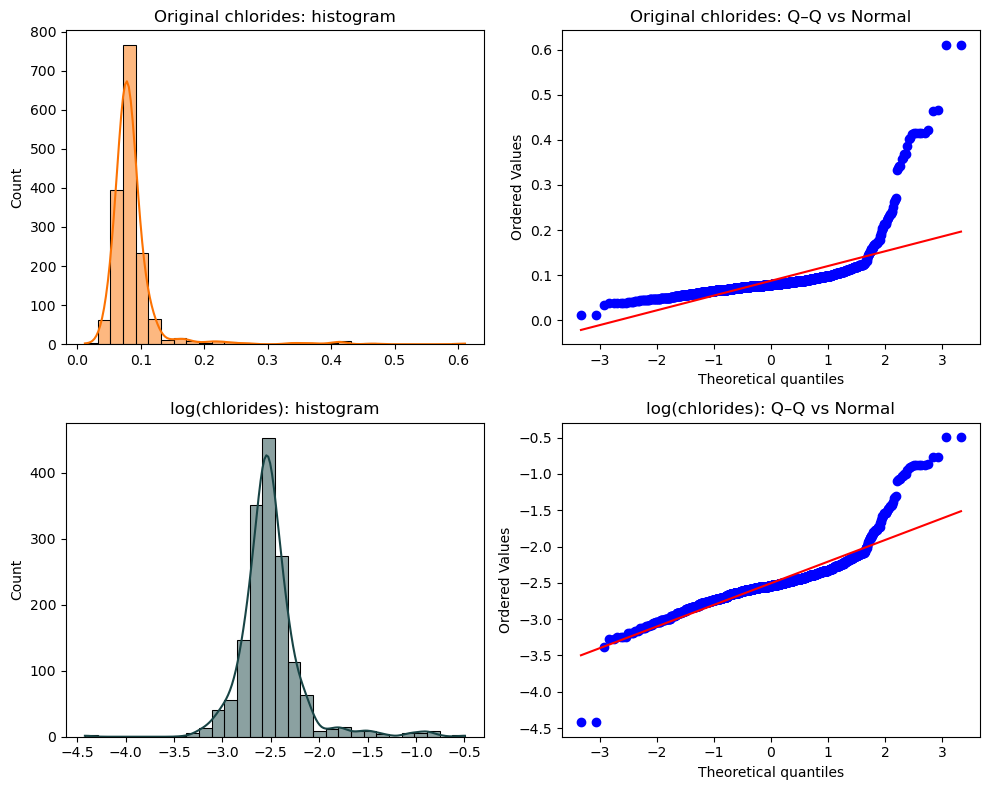

In [99]:
# Choose a candidate variable that looked right-skewed.
# Replace 'sulphates' with the variable you think might be log-normal.
candidate = 'chlorides'

x = wine_data[candidate].dropna().values
if np.any(x <= 0):
    # Use log1p if non-positive values exist
    x_log = np.log1p(x)
    log_label = 'log1p'
else:
    x_log = np.log(x)
    log_label = 'log'

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Original histogram and Q–Q
sns.histplot(x, bins=30, kde=True, color='#fc7202', ax=axes[0,0])
axes[0,0].set_title(f'Original {candidate}: histogram')

stats.probplot(x, dist="norm", plot=axes[0,1])
axes[0,1].set_title(f'Original {candidate}: Q–Q vs Normal')

# Transformed histogram and Q–Q
sns.histplot(x_log, bins=30, kde=True, color='#184445', ax=axes[1,0])
axes[1,0].set_title(f'{log_label}({candidate}): histogram')

stats.probplot(x_log, dist="norm", plot=axes[1,1])
axes[1,1].set_title(f'{log_label}({candidate}): Q–Q vs Normal')

plt.tight_layout()
plt.show()
